In [105]:
# Dependencies
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pylab as pl
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from scipy import stats

import seaborn as sns
# Store filepath in a variable
file_one = "baseball_2.csv"

# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
baseball_df = pd.read_csv(file_one, encoding="ISO-8859-1")

# Show just the header
baseball_df.head()


,Unnamed: 0,Rk,Year,Tm,Lg,G,W,L,Ties,W.L.,...,RA,Attendance,BatAge,PAge,X.Bat,X.P,Top.Player,War,Managers,current
0,1,1,2016,Arizona Diamondbacks,NL West,162,69,93,0,0.426,...,890,2036216,26.7,26.4,50,29,J.Segura,5.7,C.Hale (69-93),Arizona Diamondbacks
1,2,2,2015,Arizona Diamondbacks,NL West,162,79,83,0,0.488,...,713,2080145,26.6,27.1,50,27,P.Goldschmidt,8.8,C.Hale (79-83),Arizona Diamondbacks
2,3,3,2014,Arizona Diamondbacks,NL West,162,64,98,0,0.395,...,742,2073730,27.6,28.0,52,25,P.Goldschmidt,4.5,K.Gibson (63-96) and A.Trammell (1-2),Arizona Diamondbacks
3,4,4,2013,Arizona Diamondbacks,NL West,162,81,81,0,0.500,...,695,2134895,28.1,27.6,44,23,P.Goldschmidt,7.1,K.Gibson (81-81),Arizona Diamondbacks
4,5,5,2012,Arizona Diamondbacks,NL West,162,81,81,0,0.500,...,688,2177617,28.3,27.4,48,23,A.Hill,5.0,K.Gibson (81-81),Arizona Diamondbacks


In [106]:
len(baseball_df)

330

In [107]:
war_avg_df = baseball_df["War"].mean()
war_avg_df

6.08787878787879

In [108]:
baseball_df['War_Dummy']=baseball_df['War'].apply(lambda x: 1 if x >= 6 else 0)
baseball_df.tail()

,Unnamed: 0,Rk,Year,Tm,Lg,G,W,L,Ties,W.L.,...,Attendance,BatAge,PAge,X.Bat,X.P,Top.Player,War,Managers,current,War_Dummy
325,2553,7,2010,Washington Nationals,NL East,162,69,93,0,0.426,...,1828066,29.1,28.0,46,26,R.Zimmerman,6.2,J.Riggleman (69-93),Washington Nationals,1
326,2554,8,2009,Washington Nationals,NL East,162,59,103,0,0.364,...,1817226,28.4,27.4,55,30,R.Zimmerman,7.3,M.Acta (26-61) and J.Riggleman (33-42),Washington Nationals,1
327,2555,9,2008,Washington Nationals,NL East,161,59,102,0,0.366,...,2320400,27.7,27.3,50,25,C.Guzman,4.6,M.Acta (59-102),Washington Nationals,0
328,2556,10,2007,Washington Nationals,NL East,162,73,89,0,0.451,...,1943812,27.9,27.5,47,26,R.Zimmerman,4.6,M.Acta (73-89),Washington Nationals,0
329,2557,11,2006,Washington Nationals,NL East,162,71,91,0,0.438,...,2153056,28.5,28.9,57,29,A.Soriano,6.1,F,NaN,1


In [109]:
baseball_df['War_Dummy']=baseball_df['War'].apply(lambda x: 1 if x >= 6 else 0)

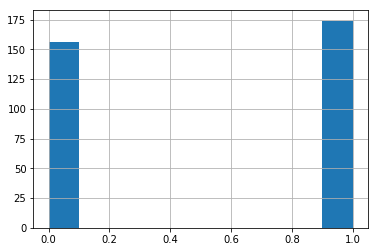

Index(['Unnamed: 0', 'Rk', 'Year', 'Tm', 'Lg', 'G', 'W', 'L', 'Ties', 'W.L.',
       'pythW.L.', 'Finish', 'GB', 'Playoffs', 'R', 'RA', ' Attendance ',
       'BatAge', 'PAge', 'X.Bat', 'X.P', 'Top.Player', 'War', 'Managers',
       'current', 'War_Dummy'],
      dtype='object')

In [110]:
baseball_df["War_Dummy"].hist()
pl.show()

baseball_df.keys()

In [9]:
#pd.crosstab(baseball_df['Attendance'], baseball_df['War_Dummy'], rownames=['Attendance'])

In [111]:
dummy_ranks = pd.get_dummies(baseball_df['War_Dummy'], prefix='War_Dummy')
dummy_ranks.head()

,War_Dummy_0,War_Dummy_1
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [112]:
baseball_df['Attendance']=pd.to_numeric(baseball_df[' Attendance '])

In [113]:
#`stats.linregress` to perform a linear regression with the year and violent crime rate columns.
War_stat = baseball_df["War"]
Attendance = baseball_df["Attendance"]
W_slope, W_int, W_r, W_p, W_std_err = stats.linregress(Attendance, War_stat)
W_fit = W_slope * Attendance + W_int

In [114]:
%matplotlib inline

In [115]:
baseball_df.dtypes


Unnamed: 0        int64
Rk                int64
Year              int64
Tm               object
Lg               object
G                 int64
W                 int64
L                 int64
Ties              int64
W.L.            float64
pythW.L.        float64
Finish           object
GB               object
Playoffs         object
R                 int64
RA                int64
 Attendance       int64
BatAge          float64
PAge            float64
X.Bat             int64
X.P               int64
Top.Player       object
War             float64
Managers         object
current          object
War_Dummy         int64
Attendance        int64
dtype: object

In [ ]:
# Grab violent crime rates
violent_crime_rate = crime_data.iloc[:, 3]
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(
    year, violent_crime_rate)
vc_fit = vc_slope * year + vc_int
do one yeat at atime , dummy nat vs. ALmer league, discrete random variable new = 0, 1year old =1

In [116]:
#grouped_year_team = pd.DataFrame(baseball_df.groupby(df_all.index.year).sum())
groupedby_baseball = baseball_df.groupby(["Tm", "Year"])
groupedby_baseball

In [117]:
teamgp_df = baseball_df.groupby(["Tm"])

In [118]:
teamgp_df.head()

,Unnamed: 0,Rk,Year,Tm,Lg,G,W,L,Ties,W.L.,...,BatAge,PAge,X.Bat,X.P,Top.Player,War,Managers,current,War_Dummy,Attendance
0,1,1,2016,Arizona Diamondbacks,NL West,162,69,93,0,0.426,...,26.7,26.4,50,29,J.Segura,5.7,C.Hale (69-93),Arizona Diamondbacks,0,2036216
1,2,2,2015,Arizona Diamondbacks,NL West,162,79,83,0,0.488,...,26.6,27.1,50,27,P.Goldschmidt,8.8,C.Hale (79-83),Arizona Diamondbacks,1,2080145
2,3,3,2014,Arizona Diamondbacks,NL West,162,64,98,0,0.395,...,27.6,28.0,52,25,P.Goldschmidt,4.5,K.Gibson (63-96) and A.Trammell (1-2),Arizona Diamondbacks,0,2073730
3,4,4,2013,Arizona Diamondbacks,NL West,162,81,81,0,0.500,...,28.1,27.6,44,23,P.Goldschmidt,7.1,K.Gibson (81-81),Arizona Diamondbacks,1,2134895
4,5,5,2012,Arizona Diamondbacks,NL West,162,81,81,0,0.500,...,28.3,27.4,48,23,A.Hill,5.0,K.Gibson (81-81),Arizona Diamondbacks,0,2177617
11,20,1,2016,Atlanta Braves,NL East,161,68,93,0,0.422,...,28.9,26.4,60,35,F.Freeman,6.5,F.Gonzalez (9-28) and B.Snitker (59-65),Atlanta Braves,1,2020914
12,21,2,2015,Atlanta Braves,NL East,162,67,95,0,0.414,...,28.8,26.6,60,37,A.Simmons,4.0,F.Gonzalez (67-95),Atlanta Braves,0,2001392
13,22,3,2014,Atlanta Braves,NL East,162,79,83,0,0.488,...,26.8,27.3,39,20,J.Heyward,6.2,F.Gonzalez (79-83),Atlanta Braves,1,2354305
14,23,4,2013,Atlanta Braves,NL East,162,96,66,0,0.593,...,26.8,27.2,44,21,A.Simmons,7.0,F.Gonzalez (96-66),Atlanta Braves,1,2548679
15,24,5,2012,Atlanta Braves,NL East,162,94,68,0,0.580,...,28.5,27.6,41,21,M.Bourn,6.1,F.Gonzalez (94-68),Atlanta Braves,1,2420171


In [119]:
# Extract item Data
specific_bball = baseball_df.loc[:,["Tm", "Attendance", "Lg", "War", "W"]]

# Perform basic calculations
avg_attendance = specific_bball.groupby(["Tm", "Lg"]).mean()["Attendance"].rename("Average_Attendance")
avg_war = specific_bball.groupby(["Tm", "Lg"]).mean()["War"].rename("Average_WAR")
avg_wins = specific_bball.groupby(["Tm", "Lg"]).mean()["W"].rename("Average_Wins")
#league = specific_bball.groupby(["Tm"]).apply()["Lg"].rename("League")
# Create new DataFrame
item_data_pd = pd.DataFrame({"Average_Attendance": avg_attendance, "Average_WAR": avg_war, "Average_Wins": avg_wins})
item_data_pd.head()

,,Average_Attendance,Average_WAR,Average_Wins
Tm,Lg,,,
Arizona Diamondbacks,NL West,2.156396e+06,6.290909,77.363636
Atlanta Braves,NL East,2.402792e+06,6.109091,82.272727
Baltimore Orioles,AL East,2.094682e+06,5.527273,77.272727
Boston Red Sox,AL East,2.980117e+06,6.690909,87.181818
Chicago Cubs,NL Central,3.023161e+06,5.645455,79.727273


In [120]:
baseball_final = item_data_pd.reset_index(level='Lg')
baseball_final.head()
baseball_final.dtypes

Lg                     object
Average_Attendance    float64
Average_WAR           float64
Average_Wins          float64
dtype: object

In [121]:
#`stats.linregress` to perform a linear regression with the year and violent crime rate columns.
War_stat = baseball_final["Average_WAR"]
Attendance = baseball_final["Average_Attendance"]
W_slope, W_int, W_r, W_p, W_std_err = stats.linregress(Attendance, War_stat)
W_fit = W_slope * Attendance + W_int

In [122]:
W_fit

Tm
Arizona Diamondbacks             5.878814
Atlanta Braves                   6.030641
Baltimore Orioles                5.840787
Boston Red Sox                   6.386382
Chicago Cubs                     6.412904
Chicago White Sox                5.866998
Cincinnati Reds                  5.889074
Cleveland Indians                5.616460
Colorado Rockies                 6.163073
Detroit Tigers                   6.273418
Houston Astros                   5.962478
Kansas City Royals               5.693908
Los Angeles Angels of Anaheim    6.509144
Los Angeles Dodgers              6.786466
Miami Marlins                    5.523758
Milwaukee Brewers                6.240421
Minnesota Twins                  6.083839
New York Mets                    6.300215
New York Yankees                 6.815258
Oakland Athletics                5.594750
Philadelphia Phillies            6.400854
Pittsburgh Pirates               5.776316
San Diego Padres                 5.971151
San Francisco Giants           

In [123]:
baseball_final['League_Dummy']=baseball_final['Lg'].apply(lambda x: 1 if (x == "NL East" or x == "NL West" 
                                                          or x == "NL Central")
                                                          else 0)
                                                          
                                            

In [124]:
baseball_final

,Lg,Average_Attendance,Average_WAR,Average_Wins,League_Dummy
Tm,,,,,
Arizona Diamondbacks,NL West,2.156396e+06,6.290909,77.363636,1
Atlanta Braves,NL East,2.402792e+06,6.109091,82.272727,1
Baltimore Orioles,AL East,2.094682e+06,5.527273,77.272727,0
Boston Red Sox,AL East,2.980117e+06,6.690909,87.181818,0
Chicago Cubs,NL Central,3.023161e+06,5.645455,79.727273,1
Chicago White Sox,AL Central,2.137219e+06,5.618182,79.272727,0
Cincinnati Reds,NL Central,2.173045e+06,5.963636,79.000000,1
Cleveland Indians,AL Central,1.730625e+06,5.854545,80.818182,0
Colorado Rockies,NL West,2.617715e+06,5.836364,75.909091,1


In [125]:
baseball_final["Average_Attendance"].count()

30

In [130]:
baseball_final["Average_Attendance"].max()

3676133.5454545454

In [131]:
baseball_final["Average_Wins"].max()

91.818181818181813

In [132]:
baseball_final["Average_Attendance"].min()

1538850.0

In [161]:
baseball_final["Average_Wins"].min()

72.090909090909093

In [134]:
X = baseball_final["Average_WAR"]
y = baseball_final["Average_Attendance"]
X = sm.add_constant(X)
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
#plt.savefig("OLS_WAR.png")
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Average_Attendance   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     13.59
Date:                Thu, 11 Oct 2018   Prob (F-statistic):           0.000969
Time:                        21:30:44   Log-Likelihood:                -434.60
No. Observations:                  30   AIC:                             873.2
Df Residuals:                      28   BIC:                             876.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.322e+05    8.8e+05     -0.832      0.413   -2.54e+06    1.07e+06
Average_WAR  5.302e+05   1.44e+05      3.686      0.001    2.36e+05    8.25e+05
==============================================================================
Omnibus:                        1.009   Durbin-Watson:                   2.212
Prob(Omnibus):                  0.604   Jarque-Bera (JB):                0.278
Skew:                          -0.183   Prob(JB):                        0.870
Kurtosis:                       3.297   Cond. No.                         61.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
X = baseball_final["Average_Wins"]
y = baseball_final["Average_Attendance"]
X = sm.add_constant(X)
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
#plt.savefig("OLS_Wins.png")
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Average_Attendance   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     28.65
Date:                Thu, 11 Oct 2018   Prob (F-statistic):           1.06e-05
Time:                        21:32:35   Log-Likelihood:                -429.96
No. Observations:                  30   AIC:                             863.9
Df Residuals:                      28   BIC:                             866.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.535e+06   1.32e+06     -3.447      0.002   -7.23e+06   -1.84e+06
Average_Wins  8.682e+04   1.62e+04      5.352      0.000    5.36e+04     1.2e+05
==============================================================================
Omnibus:                        2.550   Durbin-Watson:                   2.381
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                1.689
Skew:                          -0.579   Prob(JB):                        0.430
Kurtosis:                       3.110   Cond. No.                     1.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
X = baseball_final[["Average_Wins","Average_WAR"]] ## X usually means our input variables (or independent variables)
y = baseball_final["Average_Attendance"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)
#plt.savefig("OLS_WAR_Wins.png")
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Average_Attendance   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     14.02
Date:                Thu, 11 Oct 2018   Prob (F-statistic):           6.66e-05
Time:                        21:35:16   Log-Likelihood:                -429.85
No. Observations:                  30   AIC:                             865.7
Df Residuals:                      27   BIC:                             869.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.375e+06   1.38e+06     -3.170      0.004   -7.21e+06   -1.54e+06
Average_Wins  7.842e+04   2.47e+04      3.172      0.004    2.77e+04    1.29e+05
Average_WAR   8.551e+04   1.88e+05      0.455      0.653      -3e+05    4.71e+05
==============================================================================
Omnibus:                        2.613   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.271   Jarque-Bera (JB):                1.630
Skew:                          -0.561   Prob(JB):                        0.443
Kurtosis:                       3.211   Cond. No.                     1.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [139]:
X = baseball_final[["Average_WAR", "League_Dummy"]]
y = baseball_final["Average_Attendance"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Average_Attendance   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     8.805
Date:                Thu, 11 Oct 2018   Prob (F-statistic):            0.00114
Time:                        21:59:59   Log-Likelihood:                -433.00
No. Observations:                  30   AIC:                             872.0
Df Residuals:                      27   BIC:                             876.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.939e+05   8.63e+05     -1.152      0.260   -2.76e+06    7.77e+05
Average_WAR   5.484e+05   1.39e+05      3.938      0.001    2.63e+05    8.34e+05
League_Dummy  3.018e+05   1.73e+05      1.742      0.093   -5.36e+04    6.57e+05
==============================================================================
Omnibus:                        1.223   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.543   Jarque-Bera (JB):                0.407
Skew:                          -0.230   Prob(JB):                        0.816
Kurtosis:                       3.338   Cond. No.                         63.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
X = baseball_final[["Average_Wins", "Average_WAR", "League_Dummy"]]
y = baseball_final["Average_Attendance"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Average_Attendance   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     12.98
Date:                Thu, 11 Oct 2018   Prob (F-statistic):           2.25e-05
Time:                        21:41:36   Log-Likelihood:                -426.80
No. Observations:                  30   AIC:                             861.6
Df Residuals:                      26   BIC:                             867.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.908e+06   1.29e+06     -3.806      0.001   -7.56e+06   -2.26e+06
Average_Wins  8.337e+04   2.29e+04      3.648      0.001    3.64e+04     1.3e+05
Average_WAR   7.848e+04   1.73e+05      0.454      0.654   -2.77e+05    4.34e+05
League_Dummy  3.489e+05   1.44e+05      2.420      0.023    5.26e+04    6.45e+05
==============================================================================
Omnibus:                        1.006   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.605   Jarque-Bera (JB):                0.627
Skew:                          -0.353   Prob(JB):                        0.731
Kurtosis:                       2.936   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
X = baseball_final[["Average_Wins", "League_Dummy"]]
y = baseball_final["Average_Attendance"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Average_Attendance   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     19.96
Date:                Thu, 11 Oct 2018   Prob (F-statistic):           4.77e-06
Time:                        22:01:54   Log-Likelihood:                -426.92
No. Observations:                  30   AIC:                             859.8
Df Residuals:                      27   BIC:                             864.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5.056e+06   1.23e+06     -4.114      0.000   -7.58e+06   -2.53e+06
Average_Wins  9.109e+04    1.5e+04      6.063      0.000    6.03e+04    1.22e+05
League_Dummy    3.5e+05   1.42e+05      2.465      0.020    5.86e+04    6.41e+05
==============================================================================
Omnibus:                        0.785   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.675   Jarque-Bera (JB):                0.519
Skew:                          -0.316   Prob(JB):                        0.771
Kurtosis:                       2.878   Cond. No.                     1.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

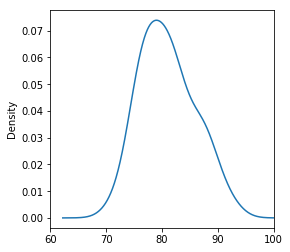

In [141]:
baseball_final["Average_Wins"].plot(kind="density",  # Create density plot
                      figsize=(4,4),    # Set figure size
                      xlim= (60, 100))      # Limit x axis values

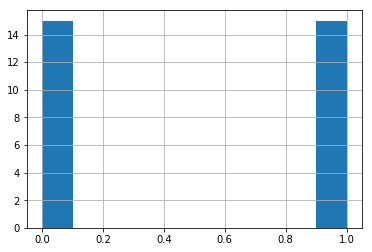

In [142]:
baseball_final["League_Dummy"].hist()




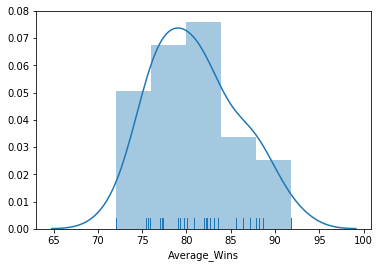

In [143]:
sns.distplot(baseball_final["Average_Wins"], hist=True, rug=True)
plt.savefig("Histo_Kernel_Wins.png")

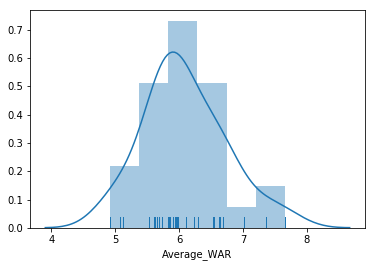

In [144]:
sns.distplot(baseball_final["Average_WAR"], hist=True, rug=True)
plt.savefig("Histo_Kernel_WAR.png")

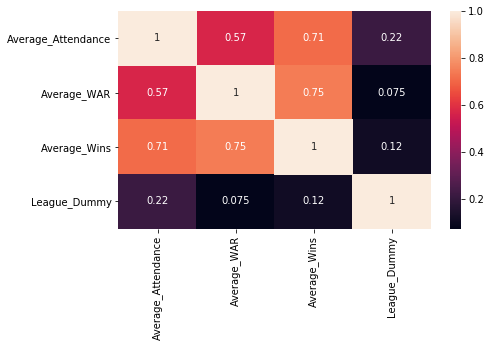

In [145]:
correlationMatrix = baseball_final.corr().abs()

plt.subplots(figsize=(7, 4))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()
plt.savefig("Correlation1_Table.png")

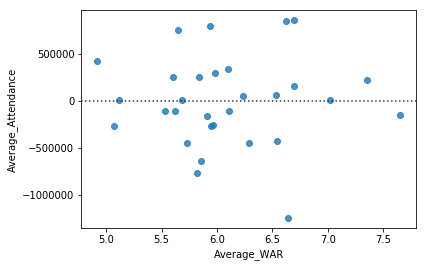

In [146]:
sns.residplot('Average_WAR', 'Average_Attendance', data=baseball_final)
plt.savefig("residualplot_war.png")

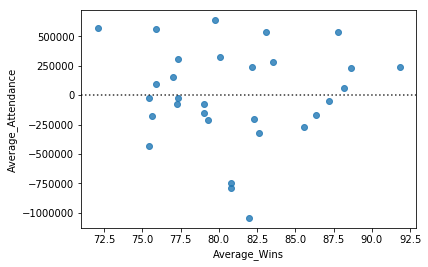

In [148]:
# simple plot of residuals
sns.residplot('Average_Wins', 'Average_Attendance', data=baseball_final)
plt.savefig("residualplot_wins.png")

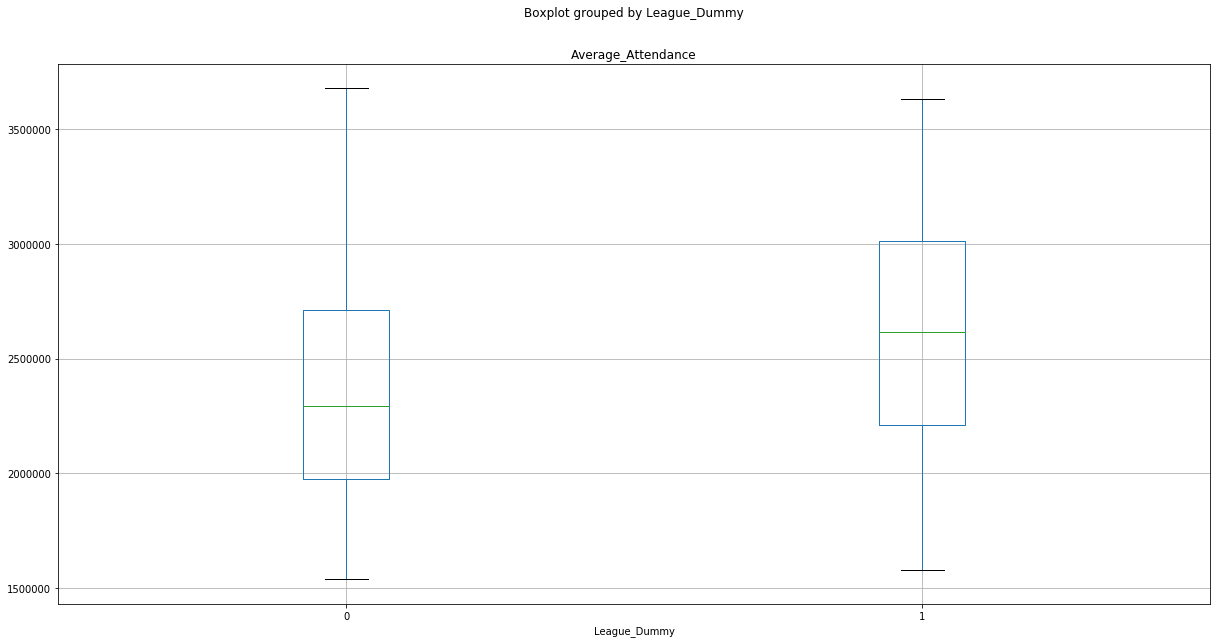

In [149]:
# Create a boxplot to compare means, 1=NationalLeague
baseball_final.boxplot("Average_Attendance", by="League_Dummy", figsize=(20, 10))
plt.savefig("Boxplot_League.png")

In [150]:
group1 = baseball_final[baseball_final["League_Dummy"] == 0]["Average_Attendance"]
group2 = baseball_final[baseball_final["League_Dummy"] == 1]["Average_Attendance"]

In [151]:
stats.ttest_ind(group1, group2, equal_var=False)


Ttest_indResult(statistic=-1.1775154784716135, pvalue=0.24892759104888582)

In [152]:
stats.f_oneway(group1, group2)

F_onewayResult(statistic=1.3865427020402352, pvalue=0.24890205109146935)

In [ ]:
#dummy_ranks = pd.get_dummies(baseball_df['War_Dummy'], prefix='War_Dummy')
#dummy_ranks.head()

(60, 100)

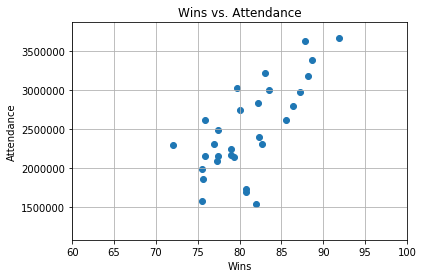

In [154]:
#plt.xlim(2, 10)

#plt.plot( W_fit, linewidth=1)
plt.ylabel("Attendance")
plt.scatter(baseball_final["Average_Wins"], baseball_final["Average_Attendance"], marker="o")
#plt.plot(baseball_final["Average_Wins"], Win_fit, "b--", linewidth=1)
# Incorporate the other graph properties
plt.title("Wins vs. Attendance")

plt.xlabel("Wins")
plt.grid(True)

# Save the figure
#plt.savefig("Temperature.png")
# Show plot
plt.savefig("ScatterNoLine_Wins_Attnd.png")
#plt.tight_layout()
plt.ylim(1079118.25, 3870599.4)
plt.xlim(60, 100)


In [155]:
#`stats.linregress` to perform a linear regression with the year and violent crime rate columns.
#baseball_final["Average_WAR"]
#Attendance = baseball_final["Average_Attendance"]
W_slope, W_int, W_r, W_p, W_std_err = stats.linregress(baseball_final["Average_WAR"], baseball_final["Average_Attendance"])
W_fit = W_slope * baseball_final["Average_WAR"]  + W_int

In [156]:
print(W_r)

0.571587010801


In [299]:
X = baseball_final["Average_WAR"] ## X usually means our input variables (or independent variables)
y = baseball_final["Average_Attendance"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()
plt.savefig("OLS_WAR.png")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Average_Attendance   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     10.79
Date:                Mon, 08 Oct 2018   Prob (F-statistic):            0.00253
Time:                        21:31:07   Log-Likelihood:                -481.25
No. Observations:                  33   AIC:                             966.5
Df Residuals:                      31   BIC:                             969.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.089e+05   9.29e+05     -0.656      0.517    -2.5e+06    1.28e+06
Average_WAR  4.996e+05   1.52e+05      3.285      0.003    1.89e+05     8.1e+05
==============================================================================
Omnibus:                        0.293   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.287
Skew:                          -0.194   Prob(JB):                        0.866
Kurtosis:                       2.761   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
Win_slope, Win_int, Win_r, Win_p, Win_std_err = stats.linregress(baseball_final["Average_Wins"], baseball_final["Average_Attendance"])
Win_fit = Win_slope * baseball_final["Average_Wins"]  + Win_int

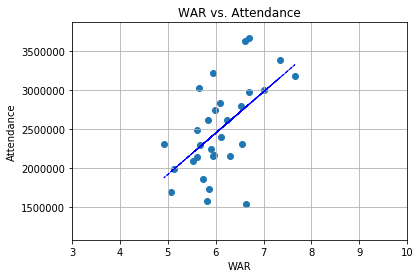

In [157]:
#plt.xlim(2, 10)

#plt.plot( W_fit, linewidth=1)
plt.ylabel("Attendance")
plt.scatter(baseball_final["Average_WAR"], baseball_final["Average_Attendance"], marker="o")
plt.plot(baseball_final["Average_WAR"], W_fit, "b--", linewidth=1)
# Incorporate the other graph properties
plt.title("WAR vs. Attendance")

plt.xlabel("WAR")
plt.grid(True)

# Save the figure
#plt.savefig("Temperature.png")
# Show plot

#plt.tight_layout()
plt.ylim(1079118.25, 3870599.4)
plt.xlim(3, 10)
plt.savefig("Scatter_WAR_Attnd.png")

(60, 100)

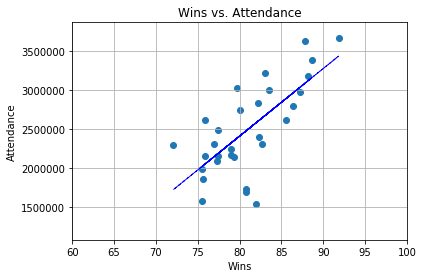

In [160]:
#plt.xlim(2, 10)

#plt.plot( W_fit, linewidth=1)
plt.ylabel("Attendance")
plt.scatter(baseball_final["Average_Wins"], baseball_final["Average_Attendance"], marker="o")
plt.plot(baseball_final["Average_Wins"], Win_fit, "b--", linewidth=1)
# Incorporate the other graph properties
plt.title("Wins vs. Attendance")

plt.xlabel("Wins")
plt.grid(True)

# Save the figure
#plt.savefig("Temperature.png")
# Show plot
plt.savefig("Scatter_Wins_Attnd.png")
#plt.tight_layout()
plt.ylim(1079118.25, 3870599.4)
plt.xlim(60, 100)


In [ ]:
print()

In [74]:
#def trendline(Attendance, War_stat, order=1, c='r', alpha=1, Rval=False):
    #"""Make a line of best fit"""

    #Calculate trendline
    coeffs = np.polyfit(Attendance, War_stat, order)

    intercept = coeffs[-1]
    slope = coeffs[-2]
    power = coeffs[0] if order == 2 else 0

    minAttendance = np.min(Attendance)
    maxAttendance = np.max(Attendance)

    xl = np.array([minAttendance, maxAttendance])
    yl = power * xl ** 2 + slope * xl + intercept

    #Plot trendline
    plt.plot(xl, yl, c, alpha=alpha)

    #Calculate R Squared
    p = np.poly1d(coeffs)

    ybar = np.sum(War_stat) / len(War_stat)
    ssreg = np.sum((p(Attendance) - ybar) ** 2)
    sstot = np.sum((War_stat - ybar) ** 2)
    Rsqr = ssreg / sstot

    if not Rval:
        #Plot R^2 value
        plt.text(0.8 * maxAttendance + 0.2 * minAttendance, 0.8 * np.max(War_stat) + 0.2 * np.min(War_stat),
                 '$R^2 = %0.2f$' % Rsqr)
    else:
        #Return the R^2 value:
        return Rsqr
    return trendline

NameError: name 'coeffs' is not defined